# **Big Sales Prediction - Random Forest Regressor**

# **Objective**
To develop an Machine Learning Model for Big Sales Prediction using Random Forest Regressor method

# **Data Source**
This dataset was taken from the github library which is maintained at YBI Foundation. This dataset consist of total 12 variables.

# **Import Library**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

# **Import Data**

In [ ]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Big%20Sales%20Data.csv")

# **Describe Data**

In [ ]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDT36         12.3          Low Fat         0.111448   
1           FDT36         12.3          Low Fat         0.111904   
2           FDT36         12.3               LF         0.111728   
3           FDT36         12.3          Low Fat         0.000000   
4           FDP12          9.8          Regular         0.045523   

      Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0  Baking Goods   33.4874            OUT049                       1999   
1  Baking Goods   33.9874            OUT017                       2007   
2  Baking Goods   33.9874            OUT018                       2009   
3  Baking Goods   34.3874            OUT019                       1985   
4  Baking Goods   35.0874            OUT017                       2007   

  Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0      Medium               Tier 1  Supermarket Type1         436.608721  
1      Medium               Tier 2  Supermarket Type1         443.127721  
2      Medium               Tier 3  Supermarket Type2         564.598400  
3       Small               Tier 1      Grocery Store        1719.370000  
4      Medium               Tier 2  Supermarket Type1         352.874000

In [ ]:
df.nunique()

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             9144
dtype: int64

# **Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 14204 entries, 0 to 14203

Data columns (total 12 columns):

 #   Column                     Non-Null Count  Dtype  

---  ------                     --------------  -----  

 0   Item_Identifier            14204 non-null  object 

 1   Item_Weight                11815 non-null  float64

 2   Item_Fat_Content           14204 non-null  object 

 3   Item_Visibility            14204 non-null  float64

 4   Item_Type                  14204 non-null  object 

 5   Item_MRP                   14204 non-null  float64

 6   Outlet_Identifier          14204 non-null  object 

 7   Outlet_Establishment_Year  14204 non-null  int64  

 8   Outlet_Size                14204 non-null  object 

 9   Outlet_Location_Type       14204 non-null  object 

 10  Outlet_Type                14204 non-null  object 

 11  Item_Outlet_Sales          14204 non-null  float64

dtypes: float64(4), int64(1), object(7)

memory usage: 1.3+ MB


In [ ]:
df.describe()

Item_Weight  Item_Visibility      Item_MRP  Outlet_Establishment_Year  \
count  11815.000000     14204.000000  14204.000000               14204.000000   
mean      12.788355         0.065953    141.004977                1997.830681   
std        4.654126         0.051459     62.086938                   8.371664   
min        4.555000         0.000000     31.290000                1985.000000   
25%        8.710000         0.027036     94.012000                1987.000000   
50%       12.500000         0.054021    142.247000                1999.000000   
75%       16.750000         0.094037    185.855600                2004.000000   
max       30.000000         0.328391    266.888400                2009.000000   

       Item_Outlet_Sales  
count       14204.000000  
mean         2185.836320  
std          1827.479550  
min            33.290000  
25%           922.135101  
50%          1768.287680  
75%          2988.110400  
max         31224.726950

In [ ]:
df.corr()

<ipython-input-183-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

  df.corr()


Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.016348  0.037288   
Item_Visibility              -0.016348         1.000000 -0.006351   
Item_MRP                      0.037288        -0.006351  1.000000   
Outlet_Establishment_Year     0.002878        -0.083678  0.000141   
Item_Outlet_Sales             0.228297        -0.158813  0.532261   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                 0.002878           0.228297  
Item_Visibility                            -0.083678          -0.158813  
Item_MRP                                    0.000141           0.532261  
Outlet_Establishment_Year                   1.000000          -0.110786  
Item_Outlet_Sales                          -0.110786           1.000000

In [ ]:
df['Item_Weight'].fillna(df.groupby(['Item_Type'])['Item_Weight'].transform('mean'),inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 14204 entries, 0 to 14203

Data columns (total 12 columns):

 #   Column                     Non-Null Count  Dtype  

---  ------                     --------------  -----  

 0   Item_Identifier            14204 non-null  object 

 1   Item_Weight                14204 non-null  float64

 2   Item_Fat_Content           14204 non-null  object 

 3   Item_Visibility            14204 non-null  float64

 4   Item_Type                  14204 non-null  object 

 5   Item_MRP                   14204 non-null  float64

 6   Outlet_Identifier          14204 non-null  object 

 7   Outlet_Establishment_Year  14204 non-null  int64  

 8   Outlet_Size                14204 non-null  object 

 9   Outlet_Location_Type       14204 non-null  object 

 10  Outlet_Type                14204 non-null  object 

 11  Item_Outlet_Sales          14204 non-null  float64

dtypes: float64(4), int64(1), object(7)

memory usage: 1.3+ MB


# **Data Visualization**

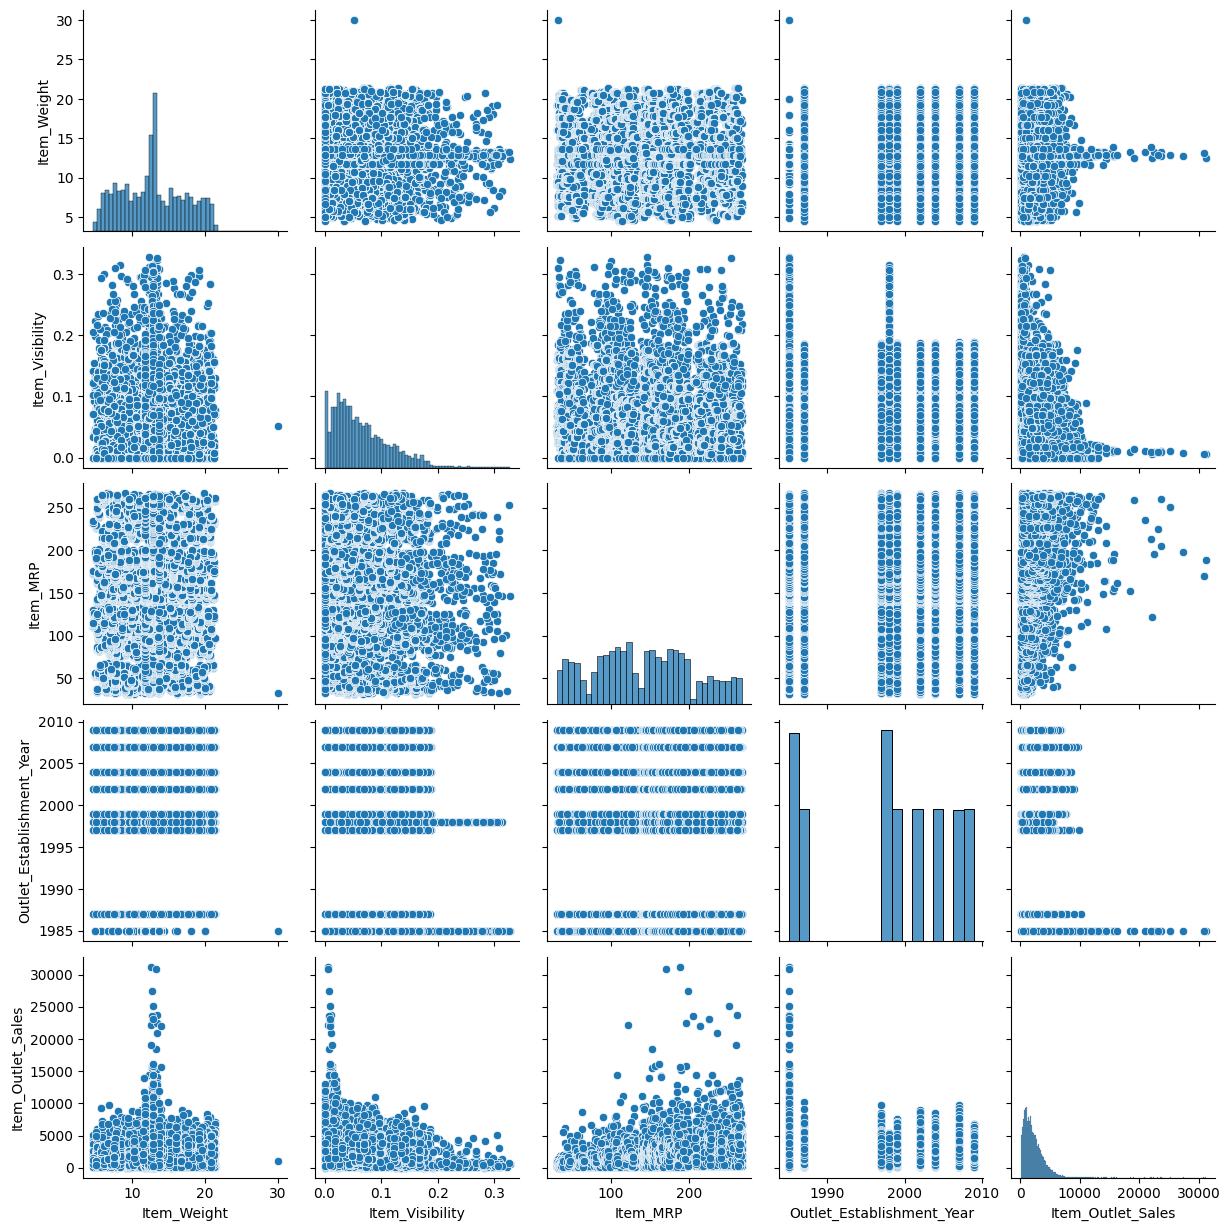

In [ ]:
sns.pairplot(df)

**Getting Categories and counts of Categorical variables**

In [ ]:
df[['Item_Identifier']].value_counts()

Item_Identifier
FDQ08              10
FDO24              10
FDQ19              10
FDQ28              10
FDQ31              10
                   ..
FDM52               7
FDM50               7
FDL50               7
FDM10               7
FDR51               7
Length: 1559, dtype: int64

In [ ]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             8485
Regular             4824
LF                   522
reg                  195
low fat              178
dtype: int64

In [ ]:
df.replace({'Item_Fat_Content':{'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'}},inplace=True)

In [ ]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             9185
Regular             5019
dtype: int64

In [ ]:
df.replace({'Item_Fat_Content':{'Low Fat':0,'Regular':1}},inplace=True)

In [ ]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
0                   9185
1                   5019
dtype: int64

In [ ]:
df[['Item_Type']].value_counts()

Item_Type            
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
dtype: int64

In [ ]:
df.replace({'Item_Type':{'Fruits and Vegetables':0, 'Snack Foods':0, 'Household':1,'Frozen Foods':0, 'Dairy':0,
                         'Baking Goods':0,'Canned':0, 'Health and Hygiene':1, 'Meat':0,'Soft Drinks':0,
                         'Breads':0, 'Hard Drinks':0,'Others':2, 'Starchy Foods':0, 'Breakfast':0,
                         'Seafood':0}},inplace=True)

In [ ]:
df[['Item_Type']].value_counts()

Item_Type
0            11518
1             2406
2              280
dtype: int64

In [ ]:
df[['Outlet_Identifier']].value_counts()

Outlet_Identifier
OUT027               1559
OUT013               1553
OUT035               1550
OUT046               1550
OUT049               1550
OUT045               1548
OUT018               1546
OUT017               1543
OUT010                925
OUT019                880
dtype: int64

In [ ]:
df[['Outlet_Size']].value_counts()

Outlet_Size
Medium         7122
Small          5529
High           1553
dtype: int64

In [ ]:
df.replace({'Outlet_Size':{'Small':0, 'Medium':1, 'High':2}},inplace=True)

In [ ]:
df[['Outlet_Size']].value_counts()

Outlet_Size
1              7122
0              5529
2              1553
dtype: int64

In [ ]:
df[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
Tier 3                  5583
Tier 2                  4641
Tier 1                  3980
dtype: int64

In [ ]:
df.replace({'Outlet_Location_Type':{'Tier 1':0, 'Tier 2':1, 'Tier 3':2}},inplace=True)

In [ ]:
df[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
2                       5583
1                       4641
0                       3980
dtype: int64

In [ ]:
df[['Outlet_Type']].value_counts()

Outlet_Type      
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
dtype: int64

In [ ]:
df.replace({'Outlet_Type':{'Grocery Store':0, 'Supermarket Type1':1, 'Supermarket Type2':2, 'Supermarket Type3':3}},inplace=True)

In [ ]:
df[['Outlet_Type']].value_counts()

Outlet_Type
1              9294
0              1805
3              1559
2              1546
dtype: int64

In [ ]:
df.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0           FDT36         12.3                 0         0.111448          0   
1           FDT36         12.3                 0         0.111904          0   
2           FDT36         12.3                 0         0.111728          0   
3           FDT36         12.3                 0         0.000000          0   
4           FDP12          9.8                 1         0.045523          0   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0   33.4874            OUT049                       1999            1   
1   33.9874            OUT017                       2007            1   
2   33.9874            OUT018                       2009            1   
3   34.3874            OUT019                       1985            0   
4   35.0874            OUT017                       2007            1   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0                     0            1         436.608721  
1                     1            1         443.127721  
2                     2            2         564.598400  
3                     0            0        1719.370000  
4                     1            1         352.874000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 14204 entries, 0 to 14203

Data columns (total 12 columns):

 #   Column                     Non-Null Count  Dtype  

---  ------                     --------------  -----  

 0   Item_Identifier            14204 non-null  object 

 1   Item_Weight                14204 non-null  float64

 2   Item_Fat_Content           14204 non-null  int64  

 3   Item_Visibility            14204 non-null  float64

 4   Item_Type                  14204 non-null  int64  

 5   Item_MRP                   14204 non-null  float64

 6   Outlet_Identifier          14204 non-null  object 

 7   Outlet_Establishment_Year  14204 non-null  int64  

 8   Outlet_Size                14204 non-null  int64  

 9   Outlet_Location_Type       14204 non-null  int64  

 10  Outlet_Type                14204 non-null  int64  

 11  Item_Outlet_Sales          14204 non-null  float64

dtypes: float64(4), int64(6), object(2)

memory usage: 1.3+ MB


In [ ]:
df.shape

(14204, 12)

# **Define Target Variable (y) and Feature Variables (X)**

In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
y = df['Item_Outlet_Sales']

In [ ]:
y.shape

(14204,)

In [ ]:
y

0         436.608721
1         443.127721
2         564.598400
3        1719.370000
4         352.874000
            ...     
14199    4984.178800
14200    2885.577200
14201    2885.577200
14202    3803.676434
14203    3644.354765
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

In [ ]:
x = df[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']]

In [ ]:
x.shape

(14204, 10)

In [ ]:
x

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0        12.300000                 0         0.111448          0   33.4874   
1        12.300000                 0         0.111904          0   33.9874   
2        12.300000                 0         0.111728          0   33.9874   
3        12.300000                 0         0.000000          0   34.3874   
4         9.800000                 1         0.045523          0   35.0874   
...            ...               ...              ...        ...       ...   
14199    12.800000                 0         0.069606          0  261.9252   
14200    12.800000                 0         0.070013          0  262.8252   
14201    12.800000                 0         0.069561          0  263.0252   
14202    13.659758                 0         0.069282          0  263.5252   
14203    12.800000                 0         0.069727          0  263.6252   

      Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0                OUT049                       1999            1   
1                OUT017                       2007            1   
2                OUT018                       2009            1   
3                OUT019                       1985            0   
4                OUT017                       2007            1   
...                 ...                        ...          ...   
14199            OUT035                       2004            0   
14200            OUT017                       2007            1   
14201            OUT013                       1987            2   
14202            OUT027                       1985            1   
14203            OUT049                       1999            1   

       Outlet_Location_Type  Outlet_Type  
0                         0            1  
1                         1            1  
2                         2            2  
3                         0            0  
4                         1            1  
...                     ...          ...  
14199                     1            1  
14200                     1            1  
14201                     2            1  
14202                     2            3  
14203                     0            1  

[14204 rows x 10 columns]

# **Train Test Split**

**Scaling Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
x = df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]

In [ ]:
x = ss.fit_transform(x)

In [ ]:
x

array([[-0.11541705,  0.88413635, -1.73178716,  0.13968068],
       [-0.11541705,  0.89300616, -1.72373366,  1.09531886],
       [-0.11541705,  0.88958331, -1.72373366,  1.3342284 ],
       ...,
       [ 0.00220132,  0.07011952,  1.96538148, -1.29377659],
       [ 0.20444792,  0.06469366,  1.97343499, -1.53268614],
       [ 0.00220132,  0.07334891,  1.97504569,  0.13968068]])

In [ ]:
x[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']] = pd.DataFrame(x, columns = [['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']])

<ipython-input-221-c860738a9bff>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

  x[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']] = pd.DataFrame(x, columns = [['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']])


IndexError: ignored

In [ ]:
pd.DataFrame(x).describe()

0             1             2             3
count  1.420400e+04  1.420400e+04  1.420400e+04  1.420400e+04
mean  -1.520734e-16 -5.202509e-17 -1.360656e-16  3.911637e-15
std    1.000035e+00  1.000035e+00  1.000035e+00  1.000035e+00
min   -1.937326e+00 -1.281712e+00 -1.767181e+00 -1.532686e+00
25%   -8.211273e-01 -7.563065e-01 -7.569166e-01 -1.293777e+00
50%    2.201320e-03 -2.318886e-01  2.000528e-02  1.396807e-01
75%    7.549589e-01  5.457876e-01  7.224096e-01  7.369545e-01
max    4.048273e+00  5.100167e+00  2.027606e+00  1.334228e+00

**After Standardization Mean is Zero and Standard Deviation is One**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split (x, y, train_size=0.7, random_state = 2529)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((9942, 4), (4262, 4), (9942,), (4262,))

# **Modeling**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor( random_state = 2529)

In [ ]:
model.fit (x_train, y_train)

RandomForestRegressor(random_state=2529)

# **Prediction**

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([1344.15099029, 3843.54313698, 1690.25941453, ..., 3031.72405397,
       1517.63767052, 2806.54085783])

# **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mean_squared_error(y_test,y_pred)

2032866.2059332472

In [ ]:
mean_absolute_error(y_test,y_pred)

872.4477818430609

In [ ]:
 r2_score(y_test, y_pred)

0.4087734780857144

# **Accuracy**

**(Visualiztion of actual vs predicted)**

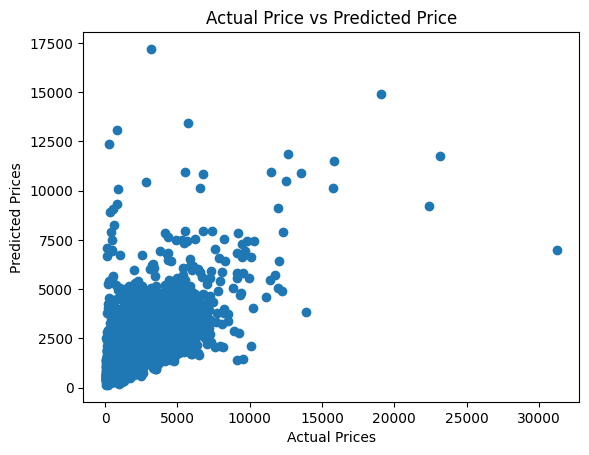

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price')
plt.show()

# **Explanation**

We had successfully build Machine Learning Model for Big Sales Prediction using Random Forest Regressor